# PISA 2012 Dataset Exploration
## by Vyacheslav Yamont

## Preliminary Wrangling

This document explores The Programme for International Student Assessment (PISA) 2012 Dataset. PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

The original dataset contains 485490 rows and 636 columns. For our analysis the dataset was reduced to 9 columns of interest. The data wrangling process is described [here](./wrangle.ipynb).

Let's load the cleaned data to pandas DataFrame.

In [2]:
df = pd.read_csv('data/pisa2012_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        485490 non-null  int64  
 1   country           485490 non-null  object 
 2   gender            485490 non-null  object 
 3   computers_number  473459 non-null  object 
 4   programming       312425 non-null  object 
 5   math              485490 non-null  float64
 6   reading           485490 non-null  float64
 7   science           485490 non-null  float64
 8   wealth            479597 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 33.3+ MB


### What is the structure of your dataset?

The dataset contains 485490 students and describes 9 features (country, gender, family computers number, interest in programming, math, reading and science scores, family wealth score). Country and gender are categorical variables, all others are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

I’m most interested in figuring out how gender, country and computer programming influence academic performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that number of computers and programming skills have a great impact on knowledge of a student, especially on the math score. I also think that gender and wealth score don’t have any statistically significant effect.

## Univariate Exploration

### Distribution of Subject Scores

I'll start by looking at the distribution of the main variables of interest: math, reading and science scores.

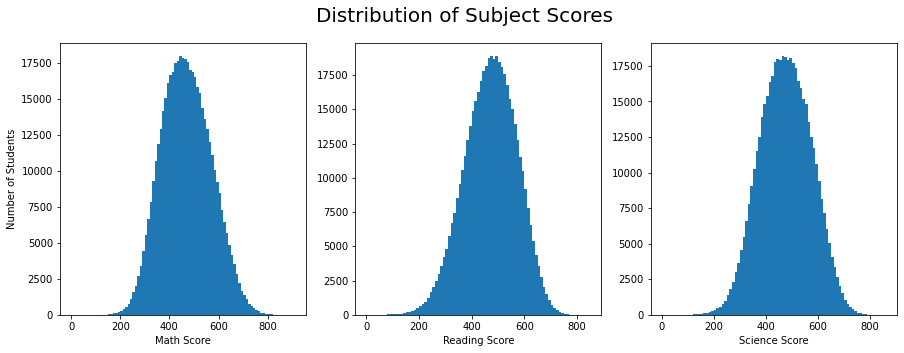

In [4]:
# Select bin size
binsize = 10

plt.figure(figsize=[15, 5])
plt.suptitle('Distribution of Subject Scores', size=20)

# Plot Math
plt.subplot(1, 3, 1)
bins = np.arange(0, df['math'].max()+binsize, binsize)
plt.hist(data = df, x = 'math', bins = bins)
plt.xlabel('Math Score')
plt.ylabel('Number of Students')

# Plot Reading
plt.subplot(1, 3, 2)
bins = np.arange(0, df['reading'].max()+binsize, binsize)
plt.hist(data = df, x = 'reading', bins = bins)
plt.xlabel('Reading Score')

# Plot Science
plt.subplot(1, 3, 3)
bins = np.arange(0, df['science'].max()+binsize, binsize)
plt.hist(data = df, x = 'science', bins = bins)
plt.xlabel('Science Score')

# Save
plt.savefig('img/scores_dist.png', dpi=200, bbox_inches="tight");

All scores looks normaly distributed.

### Number os Students by Contry

In [5]:
base_color = sb.color_palette()[0]

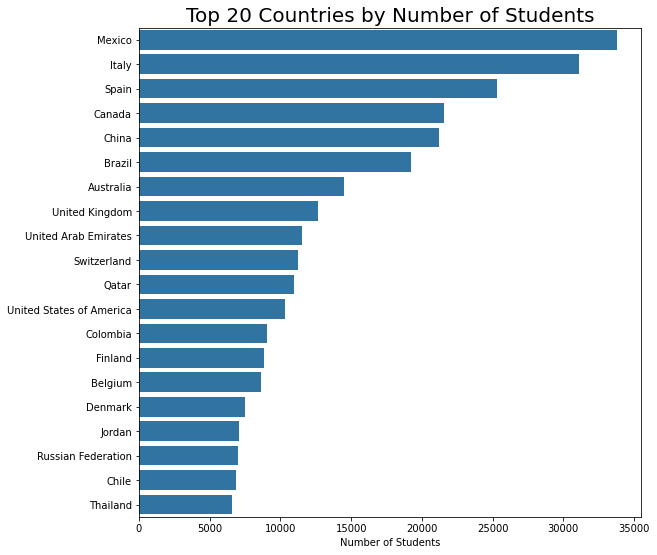

In [6]:
# Get top20 countries
data = df['country'].value_counts().head(20)

# Plot
plt.figure(figsize=[9, 9])
sb.countplot(data=df, y='country', order=data.index, color=base_color)
plt.title('Top 20 Countries by Number of Students', size=20)
plt.xlabel('Number of Students')
plt.ylabel(None)

# Save
plt.savefig('img/top20_countries.png', dpi=200, bbox_inches="tight");

The most active countries are Mexico, Italy and Spain. It seems that only several countries provided significantly more students.

Let's look at the distribution.

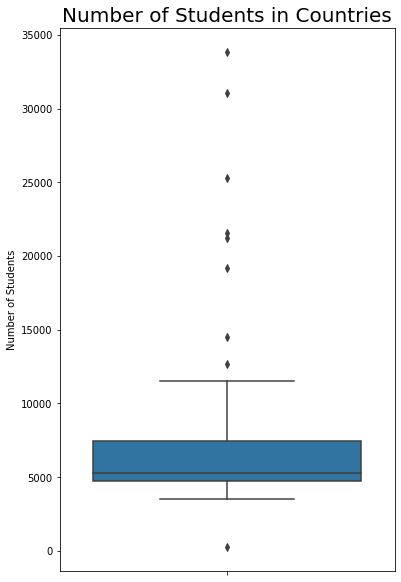

In [7]:
# Plot
plt.figure(figsize=(6,10))
sb.boxplot(df['country'].value_counts(), orient="v", color=base_color)
plt.title('Number of Students in Countries', size=20)
plt.ylabel('Number of Students')

# Save
plt.savefig('img/students_countries.png', dpi=200, bbox_inches="tight");

So on average there were around 5000 students per country with an interquartile range around 3000 students.

### Family Computers Number

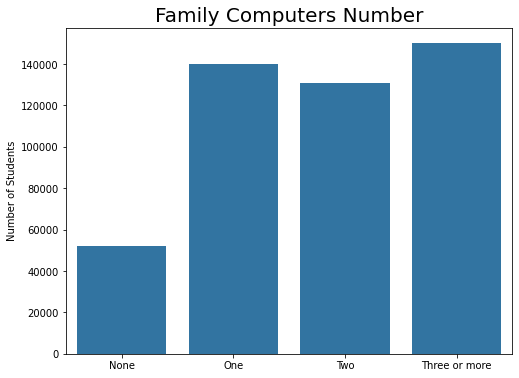

In [8]:
# Plot
plt.figure(figsize=[8, 6])
sb.countplot(data=df,
             x='computers_number',
             order=['None', 'One', 'Two', 'Three or more'],
             color=base_color)
plt.title('Family Computers Number', size=20)
plt.ylabel('Number of Students')
plt.xlabel(None)

# Save
plt.savefig('img/computer_num.png', dpi=200, bbox_inches="tight");

It seems that families with no computer at all are rare. Interesting fact is that having three or more computers is more common than having one or two computers.

### Programming Rate

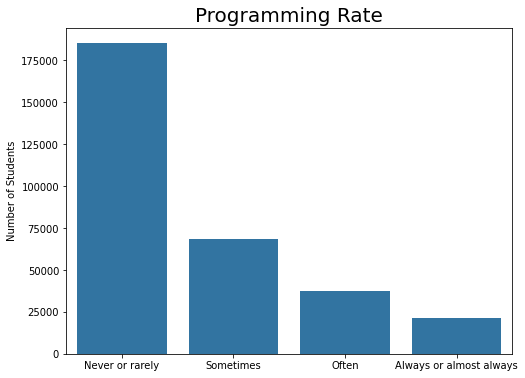

In [9]:
# Plot
plt.figure(figsize=[8, 6])
sb.countplot(data=df, x='programming', color=base_color)
plt.title('Programming Rate', size=20)
plt.ylabel('Number of Students')
plt.xlabel(None)

# Save
plt.savefig('img/programming.png', dpi=200, bbox_inches="tight");

Distribution looks as it supposed to be. The number of students who use programming is far less than those who never use it.

### Wealth

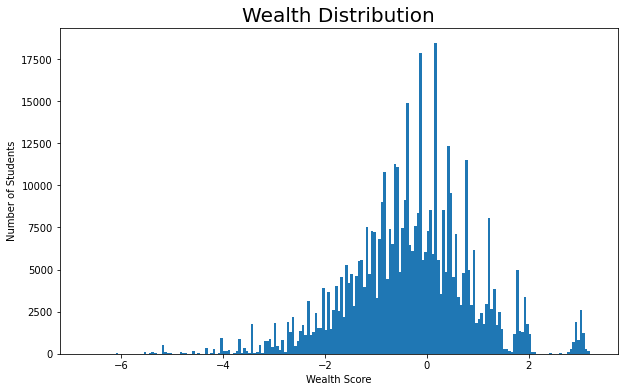

In [10]:
# Create appropriate bins
binsize = 0.05
bins = np.arange(df['wealth'].min()-binsize, df['wealth'].max()+binsize, binsize)

# Plot
plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'wealth', bins = bins)
plt.title('Wealth Distribution', size=20)
plt.ylabel('Number of Students')
plt.xlabel('Wealth Score')

# Save
plt.savefig('img/wealth_dist.png', dpi=200, bbox_inches="tight");

Wealth distribution has a slight skew to the left. Also we can notice several outliers at the high side.

Let's look closer to wealthy students (wealth index greated than 2).

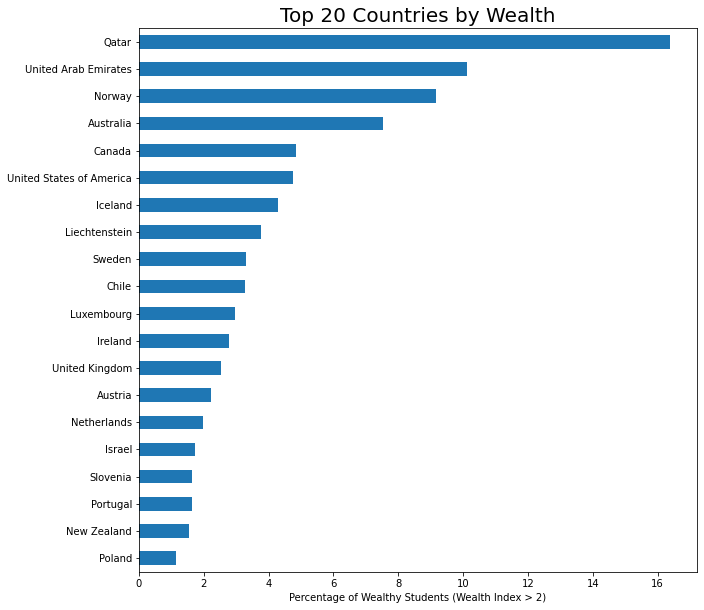

In [11]:
# Create a copy
df_copy = df.copy()

# Create wealthy property
df_copy['wealthy'] = df_copy['wealth'] > 2

# Find percentage of wealthy by country
dep = df_copy.groupby('country').wealthy.mean().mul(100)

# Plot
plt.figure(figsize=[10, 10])
dep.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Countries by Wealth', size=20)
plt.xlabel('Percentage of Wealthy Students (Wealth Index > 2)')
plt.ylabel(None);

# Save
plt.savefig('img/top20_wealthy.png', dpi=200, bbox_inches="tight");

We have very interesting and partly surprising results here. But it doesn't make any sense for our analysis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are outliers for number of students per countries and wealth scores. But it's absoulutely normal and nothing should be done with that.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!